In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler



In [6]:
df = pd.read_excel('/Users/apple/Desktop/10 academy/week1/data/Week1_challenge_data_source.xlsx')

In [49]:
df_exp=df.copy()

In [50]:
df_exp.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [51]:
df_exp.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [52]:
# number of data points
print(f" There are {df_exp.shape[0]} rows and {df_exp.shape[1]} columns")

 There are 150001 rows and 55 columns


In [53]:
# identify the missing values
df_exp.isnull().sum()


Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.   
Aggregate per user the following information in the column  
number of xDR sessions
Session duration
the total download (DL) and upload (UL) data
the total data volume (in Bytes) during this session for each application


In [54]:
features=['Bearer Id','IMEI' , 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
'Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
'Email UL (Bytes)','Gaming DL (Bytes)', 'Gaming UL (Bytes)']

In [96]:
# get the important dataframe for task 1.1
df_anal=df_exp[features]
df_anal

,Bearer Id,IMEI,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,1.311448e+19,3.552121e+13,1823652.0,308879636.0,36749741.0,1.545765e+06,24420.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,2.780823e+08,1.434415e+07
1,1.311448e+19,3.579401e+13,1365104.0,653384965.0,53800391.0,1.926113e+06,7165.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,6.087501e+08,1.170709e+06
2,1.311448e+19,3.528151e+13,1361762.0,279807335.0,27883638.0,1.684053e+06,42224.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,2.295846e+08,3.956300e+05
3,1.311448e+19,3.535661e+13,1321509.0,846028530.0,43324218.0,6.441210e+05,13372.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,7.995382e+08,1.084972e+07
4,1.311448e+19,3.540701e+13,1089009.0,569138589.0,38542814.0,8.626000e+05,50188.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,5.277072e+08,3.529801e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,3.548311e+13,81230.0,574175259.0,57628851.0,3.464974e+06,52091.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,5.266097e+08,9.197207e+06
149997,7.349883e+18,3.566051e+13,97970.0,666648844.0,39135081.0,2.344568e+06,7613.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,6.268931e+08,4.735033e+06
149998,1.311448e+19,3.572121e+13,98249.0,592786405.0,34912224.0,1.245845e+06,14394.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,5.535395e+08,1.339432e+07
149999,1.311448e+19,8.618620e+13,97910.0,371895920.0,29626096.0,8.015470e+05,21562.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,3.525370e+08,2.529475e+06


In [56]:
df_anal.isnull().sum()

Bearer Id                  991
IMEI                       572
Dur. (ms)                    1
Total DL (Bytes)             1
Total UL (Bytes)             1
Social Media DL (Bytes)      0
Social Media UL (Bytes)      0
Youtube DL (Bytes)           0
Youtube UL (Bytes)           0
Netflix DL (Bytes)           0
Netflix UL (Bytes)           0
Google DL (Bytes)            0
Google UL (Bytes)            0
Email DL (Bytes)             0
Email UL (Bytes)             0
Gaming DL (Bytes)            0
Gaming UL (Bytes)            0
dtype: int64

In [57]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The  dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df_anal)

The  dataset contains 0.06 % missing values.


In [58]:
df_anal

,Bearer Id,IMEI,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,1.311448e+19,3.552121e+13,1823652.0,308879636.0,36749741.0,1.545765e+06,24420.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,2.780823e+08,1.434415e+07
1,1.311448e+19,3.579401e+13,1365104.0,653384965.0,53800391.0,1.926113e+06,7165.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,6.087501e+08,1.170709e+06
2,1.311448e+19,3.528151e+13,1361762.0,279807335.0,27883638.0,1.684053e+06,42224.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,2.295846e+08,3.956300e+05
3,1.311448e+19,3.535661e+13,1321509.0,846028530.0,43324218.0,6.441210e+05,13372.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,7.995382e+08,1.084972e+07
4,1.311448e+19,3.540701e+13,1089009.0,569138589.0,38542814.0,8.626000e+05,50188.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,5.277072e+08,3.529801e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,3.548311e+13,81230.0,574175259.0,57628851.0,3.464974e+06,52091.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,5.266097e+08,9.197207e+06
149997,7.349883e+18,3.566051e+13,97970.0,666648844.0,39135081.0,2.344568e+06,7613.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,6.268931e+08,4.735033e+06
149998,1.311448e+19,3.572121e+13,98249.0,592786405.0,34912224.0,1.245845e+06,14394.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,5.535395e+08,1.339432e+07
149999,1.311448e+19,8.618620e+13,97910.0,371895920.0,29626096.0,8.015470e+05,21562.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,3.525370e+08,2.529475e+06


In [59]:
# asThe  dataset contains 0.06 % missing values is not high, we can afford to drop missing values
df_clean=df_anal.dropna(axis=0)
df_clean.isnull().sum()

Bearer Id                  0
IMEI                       0
Dur. (ms)                  0
Total DL (Bytes)           0
Total UL (Bytes)           0
Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
dtype: int64

In [60]:
# check some row
df_clean.head()

,Bearer Id,IMEI,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,1.311448e+19,3.552121e+13,1823652.0,308879636.0,36749741.0,1545765.0,24420.0,15854611.0,2501332.0,8198936.0,9656251.0,1634479.0,1271433.0,3563542.0,137762.0,278082303.0,14344150.0
1,1.311448e+19,3.579401e+13,1365104.0,653384965.0,53800391.0,1926113.0,7165.0,20247395.0,19111729.0,18338413.0,17227132.0,3493924.0,920172.0,629046.0,308339.0,608750074.0,1170709.0
2,1.311448e+19,3.528151e+13,1361762.0,279807335.0,27883638.0,1684053.0,42224.0,19725661.0,14699576.0,17587794.0,6163408.0,8535055.0,1694064.0,2690151.0,672973.0,229584621.0,395630.0
3,1.311448e+19,3.535661e+13,1321509.0,846028530.0,43324218.0,644121.0,13372.0,21388122.0,15146643.0,13994646.0,1097942.0,9023734.0,2788027.0,1439754.0,631229.0,799538153.0,10849722.0
4,1.311448e+19,3.540701e+13,1089009.0,569138589.0,38542814.0,862600.0,50188.0,15259380.0,18962873.0,17124581.0,415218.0,6248284.0,1500559.0,1936496.0,173853.0,527707248.0,3529801.0


In [82]:
# the total data volume (in Bytes) during this session for each application,
# which is aggregate of all the applications provided
apps=['IMEI','Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
'Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
'Email UL (Bytes)','Gaming DL (Bytes)', 'Gaming UL (Bytes)']
# get specific dataset for apps only
df_apps=df_clean[apps]
df_apps

,IMEI,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,3.552121e+13,1545765.0,24420.0,15854611.0,2501332.0,8198936.0,9656251.0,1634479.0,1271433.0,3563542.0,137762.0,278082303.0,14344150.0
1,3.579401e+13,1926113.0,7165.0,20247395.0,19111729.0,18338413.0,17227132.0,3493924.0,920172.0,629046.0,308339.0,608750074.0,1170709.0
2,3.528151e+13,1684053.0,42224.0,19725661.0,14699576.0,17587794.0,6163408.0,8535055.0,1694064.0,2690151.0,672973.0,229584621.0,395630.0
3,3.535661e+13,644121.0,13372.0,21388122.0,15146643.0,13994646.0,1097942.0,9023734.0,2788027.0,1439754.0,631229.0,799538153.0,10849722.0
4,3.540701e+13,862600.0,50188.0,15259380.0,18962873.0,17124581.0,415218.0,6248284.0,1500559.0,1936496.0,173853.0,527707248.0,3529801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,3.533251e+13,962097.0,31078.0,6550499.0,18003146.0,22468983.0,7149728.0,1139573.0,126061.0,3459965.0,820142.0,784435351.0,12724751.0
149996,3.548311e+13,3464974.0,52091.0,16191667.0,11763428.0,17883703.0,19678161.0,9967603.0,2817311.0,57639.0,633237.0,526609673.0,9197207.0
149997,3.566051e+13,2344568.0,7613.0,13877234.0,8288284.0,19350146.0,21293148.0,2229420.0,2185941.0,1954414.0,167304.0,626893062.0,4735033.0
149998,3.572121e+13,1245845.0,14394.0,22660510.0,1855903.0,9963942.0,5065760.0,3850890.0,2734579.0,1525734.0,532543.0,553539484.0,13394316.0


In [81]:
df_apps_agg = df_apps.groupby(['IMEI']).agg({
       'Social Media DL (Bytes)': 'mean',
       'Social Media UL (Bytes)':'mean',
       'Youtube DL (Bytes)':'mean',
       'Youtube UL (Bytes)':'mean',
       'Google DL (Bytes)':'mean',
       'Google UL (Bytes)':'mean',
       'Email DL (Bytes)':'mean',
       'Email UL (Bytes)':'mean',
       'Gaming DL (Bytes)':'mean',
       'Gaming UL (Bytes)':'mean'
       }
)
# aggregate the application volume in Bytes
df_apps_agg

,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
IMEI,,,,,,,,,,
4.400152e+11,2530606.0,23968.0,17663991.0,10703865.0,9125569.0,3608143.0,989198.0,144441.0,159786457.0,1317702.0
4.402138e+11,1301037.0,10391.0,16138988.0,5122393.0,8520422.0,1514991.0,2585927.0,688283.0,86956751.0,4188367.0
1.194901e+12,3440702.0,21582.0,11564842.0,12364791.0,8410141.0,1073199.0,1483785.0,580787.0,827578143.0,11383285.0
1.198201e+12,2155310.0,47026.0,17902177.0,19542058.0,5157701.0,1790556.0,1641265.0,17994.0,743030255.0,11575761.0
1.202601e+12,356443.0,40729.0,14930167.0,5631939.0,5895854.0,1209943.0,413901.0,422686.0,770457035.0,3537598.0
...,...,...,...,...,...,...,...,...,...,...
9.900120e+13,2548908.0,19423.0,23028070.0,3288163.0,6692349.0,1614004.0,3072288.0,262886.0,810397893.0,8034861.0
9.900120e+13,1823780.0,40173.0,7657831.0,16255095.0,10320330.0,3955033.0,855847.0,407553.0,253039860.0,5811282.0
9.900120e+13,1194056.0,11484.0,7758118.0,18200855.0,8423513.0,224804.0,2540187.0,714363.0,313938694.0,14484574.0


<AxesSubplot:>

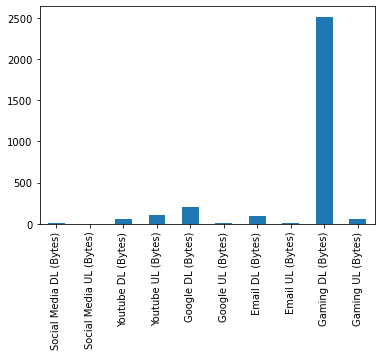

In [93]:
df_apps_agg.min().plot(kind='bar')

Task 1.2.
Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

In [83]:
# clean dataset
df_clean

,Bearer Id,IMEI,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,1.311448e+19,3.552121e+13,1823652.0,308879636.0,36749741.0,1545765.0,24420.0,15854611.0,2501332.0,8198936.0,9656251.0,1634479.0,1271433.0,3563542.0,137762.0,278082303.0,14344150.0
1,1.311448e+19,3.579401e+13,1365104.0,653384965.0,53800391.0,1926113.0,7165.0,20247395.0,19111729.0,18338413.0,17227132.0,3493924.0,920172.0,629046.0,308339.0,608750074.0,1170709.0
2,1.311448e+19,3.528151e+13,1361762.0,279807335.0,27883638.0,1684053.0,42224.0,19725661.0,14699576.0,17587794.0,6163408.0,8535055.0,1694064.0,2690151.0,672973.0,229584621.0,395630.0
3,1.311448e+19,3.535661e+13,1321509.0,846028530.0,43324218.0,644121.0,13372.0,21388122.0,15146643.0,13994646.0,1097942.0,9023734.0,2788027.0,1439754.0,631229.0,799538153.0,10849722.0
4,1.311448e+19,3.540701e+13,1089009.0,569138589.0,38542814.0,862600.0,50188.0,15259380.0,18962873.0,17124581.0,415218.0,6248284.0,1500559.0,1936496.0,173853.0,527707248.0,3529801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,3.533251e+13,59587.0,819016468.0,53745392.0,962097.0,31078.0,6550499.0,18003146.0,22468983.0,7149728.0,1139573.0,126061.0,3459965.0,820142.0,784435351.0,12724751.0
149996,7.277826e+18,3.548311e+13,81230.0,574175259.0,57628851.0,3464974.0,52091.0,16191667.0,11763428.0,17883703.0,19678161.0,9967603.0,2817311.0,57639.0,633237.0,526609673.0,9197207.0
149997,7.349883e+18,3.566051e+13,97970.0,666648844.0,39135081.0,2344568.0,7613.0,13877234.0,8288284.0,19350146.0,21293148.0,2229420.0,2185941.0,1954414.0,167304.0,626893062.0,4735033.0
149998,1.311448e+19,3.572121e+13,98249.0,592786405.0,34912224.0,1245845.0,14394.0,22660510.0,1855903.0,9963942.0,5065760.0,3850890.0,2734579.0,1525734.0,532543.0,553539484.0,13394316.0


In [103]:
# lets look at the download per client
df_downloads= df_anal[['IMEI','Total DL (Bytes)' , 'Total UL (Bytes)']]
percent_missing(df_downloads)
df_downloads.isnull().sum()

The  dataset contains 0.13 % missing values.


IMEI                572
Total DL (Bytes)      1
Total UL (Bytes)      1
dtype: int64

In [124]:
df_downloads_clean=df_downloads.dropna(axis=0)
df_downloads_clean

,IMEI,Total DL (Bytes),Total UL (Bytes)
0,3.552121e+13,308879636.0,36749741.0
1,3.579401e+13,653384965.0,53800391.0
2,3.528151e+13,279807335.0,27883638.0
3,3.535661e+13,846028530.0,43324218.0
4,3.540701e+13,569138589.0,38542814.0
...,...,...,...
149995,3.533251e+13,819016468.0,53745392.0
149996,3.548311e+13,574175259.0,57628851.0
149997,3.566051e+13,666648844.0,39135081.0
149998,3.572121e+13,592786405.0,34912224.0


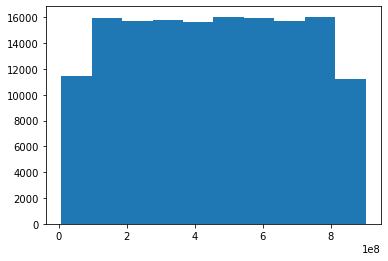

In [123]:
count, bins, ignored =plt.hist(df_downloads_clean['Total DL (Bytes)'])



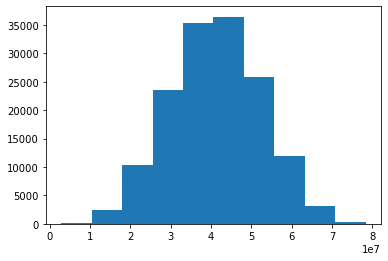

In [122]:
count, bins, ignored =plt.hist(df_downloads_clean['Total UL (Bytes)'])
plt.show()

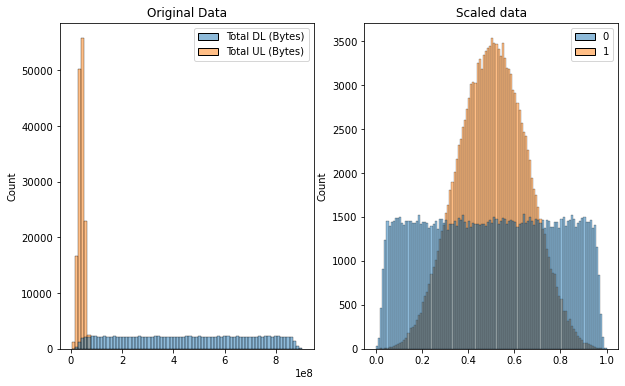

In [130]:
# mix-max scale the data between 0 and 1
minmax_scaler = MinMaxScaler()

minmax_scaler = MinMaxScaler()
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(df_downloads_clean[['Total DL (Bytes)' , 'Total UL (Bytes)']])

In [131]:
df_clean.dtypes

Bearer Id                  float64
IMEI                       float64
Dur. (ms)                  float64
Total DL (Bytes)           float64
Total UL (Bytes)           float64
Social Media DL (Bytes)    float64
Social Media UL (Bytes)    float64
Youtube DL (Bytes)         float64
Youtube UL (Bytes)         float64
Netflix DL (Bytes)         float64
Netflix UL (Bytes)         float64
Google DL (Bytes)          float64
Google UL (Bytes)          float64
Email DL (Bytes)           float64
Email UL (Bytes)           float64
Gaming DL (Bytes)          float64
Gaming UL (Bytes)          float64
dtype: object

Utility function

In [132]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

Univariate analysis

Data Exploration or Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics which include:

detection of mistakes, outliers or abnormalities
determining relationships among the explanatory variables
assessing the relationships between explanatory and outcome variables

In [133]:
df_clean.columns

Index(['Bearer Id', 'IMEI', 'Dur. (ms)', 'Total DL (Bytes)',
       'Total UL (Bytes)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)',
       'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
      dtype='object')

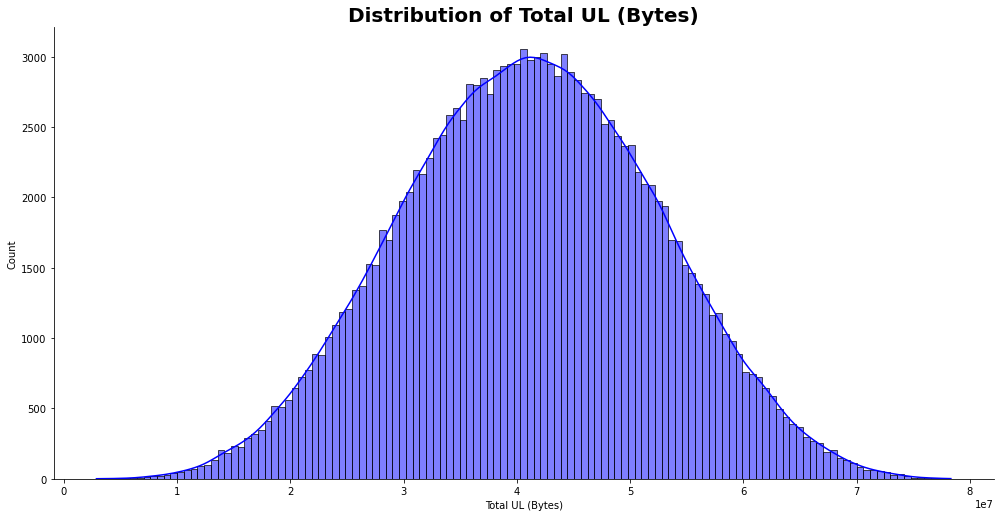

In [147]:
df_clean['Bearer Id']
plot_hist(df_clean, 'Total UL (Bytes)', "blue")

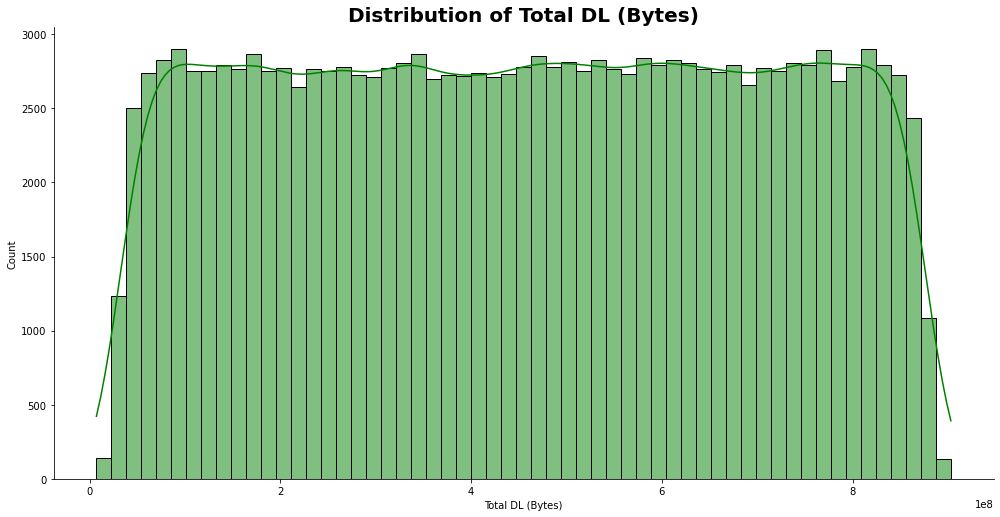

In [149]:
plot_hist(df_clean, 'Total DL (Bytes)', "green")

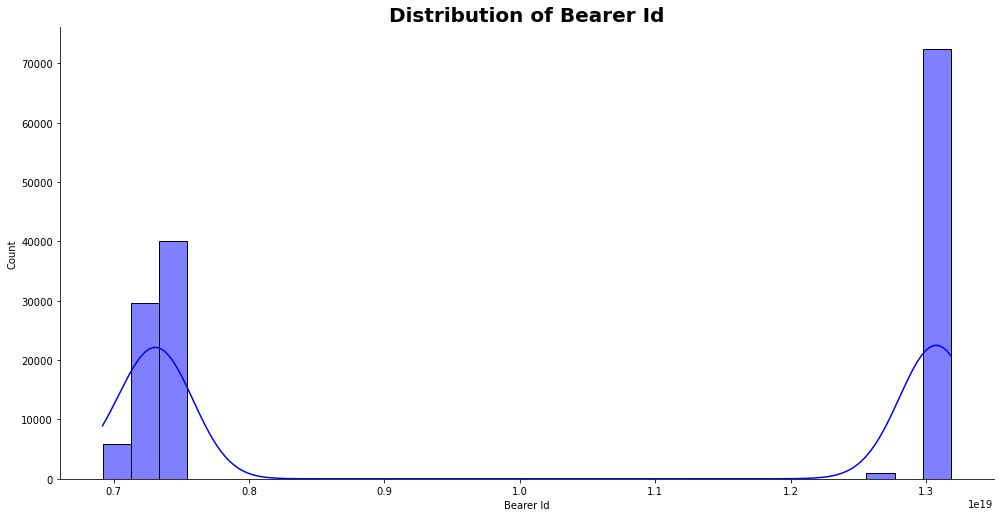

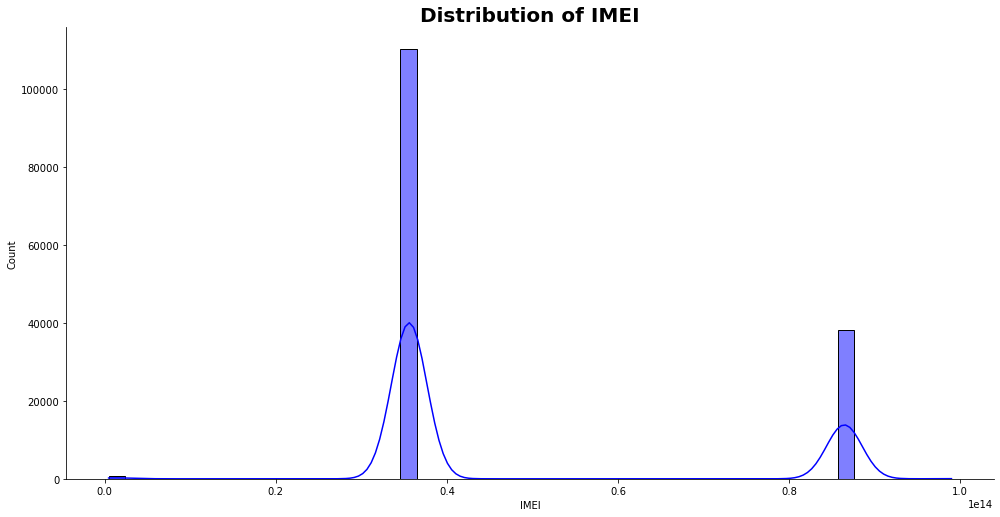

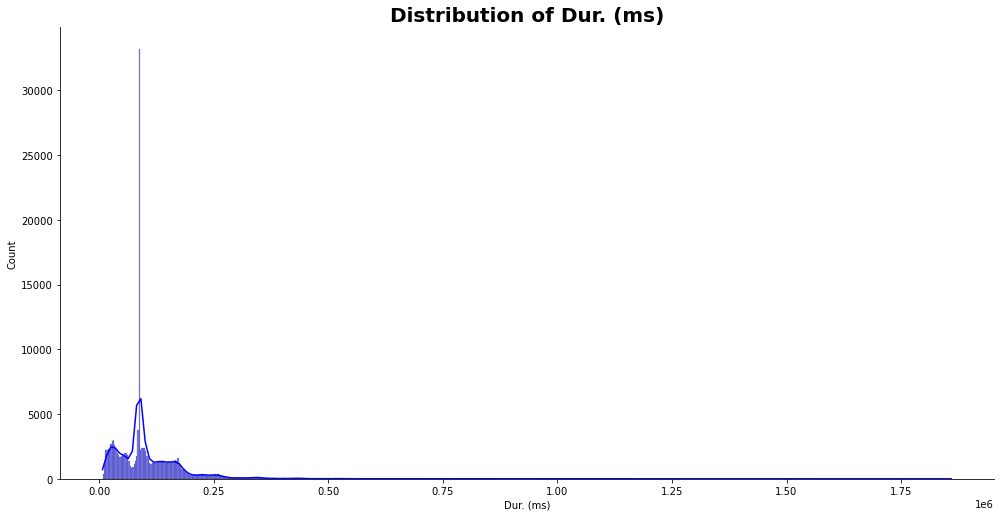

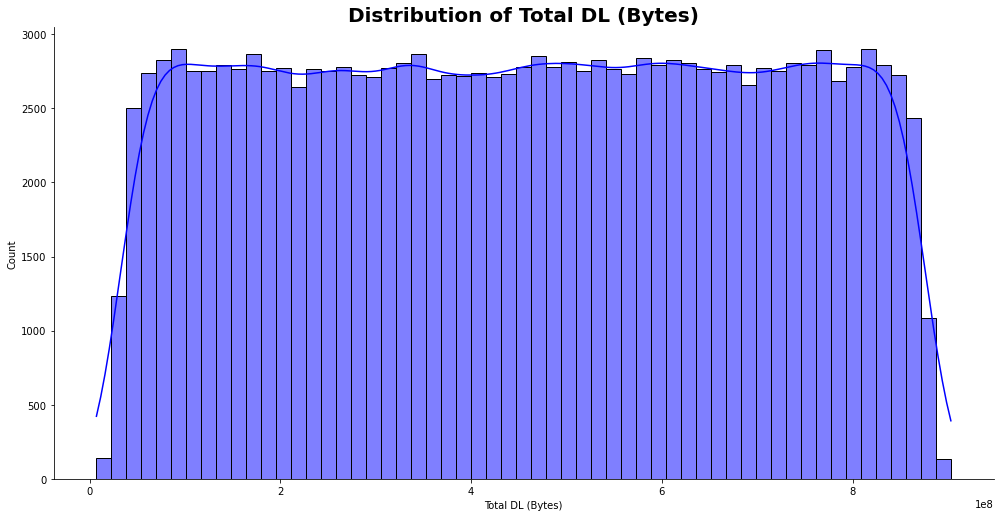

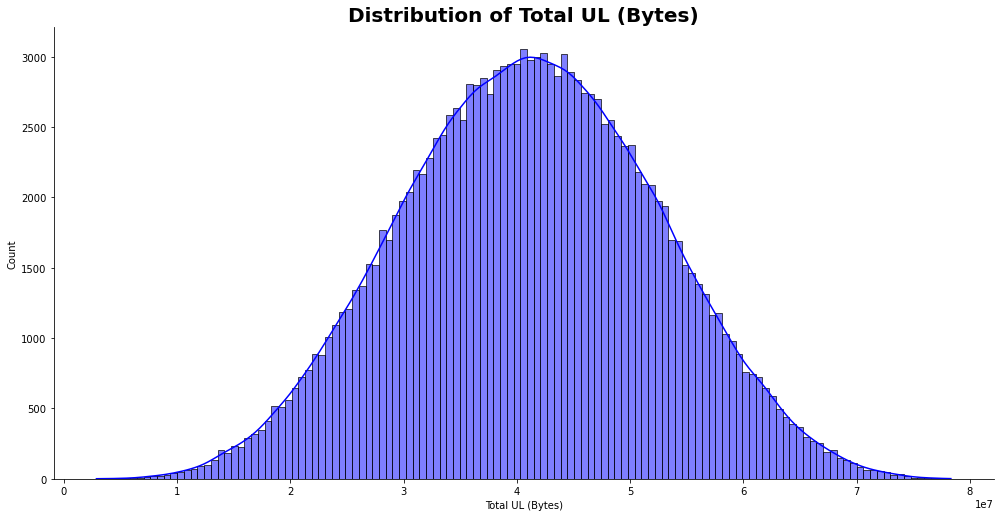

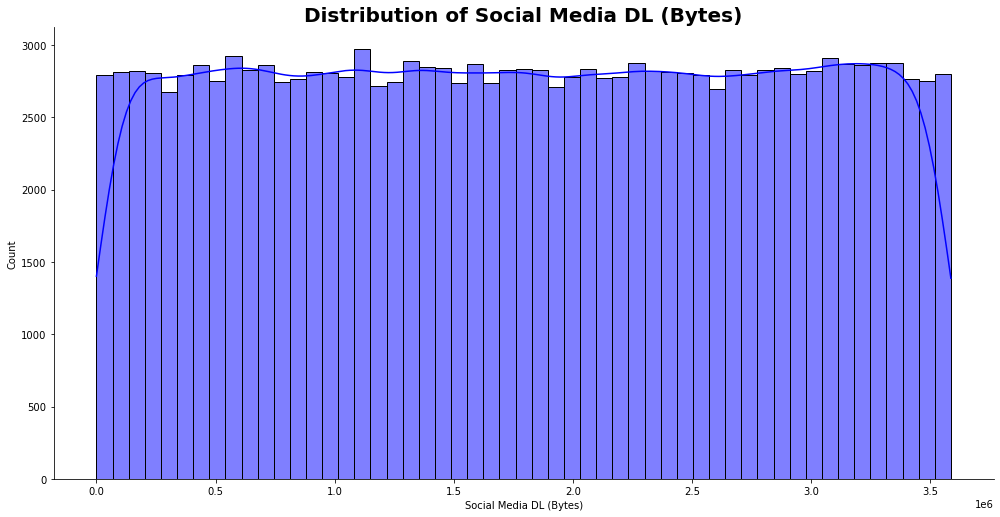

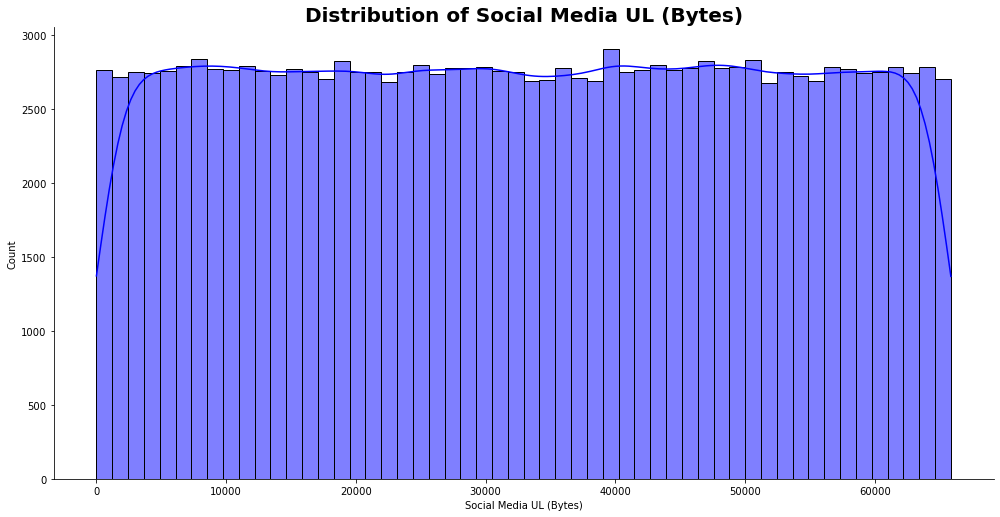

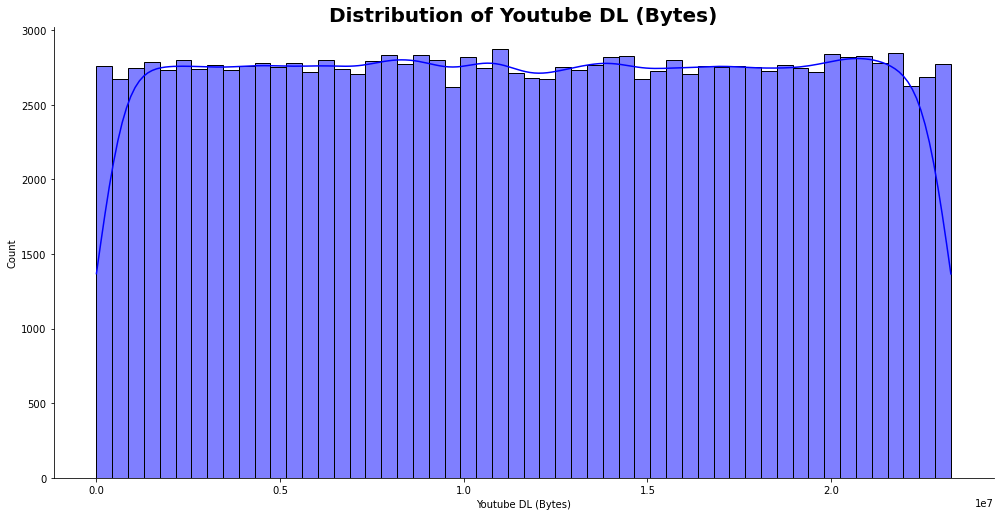

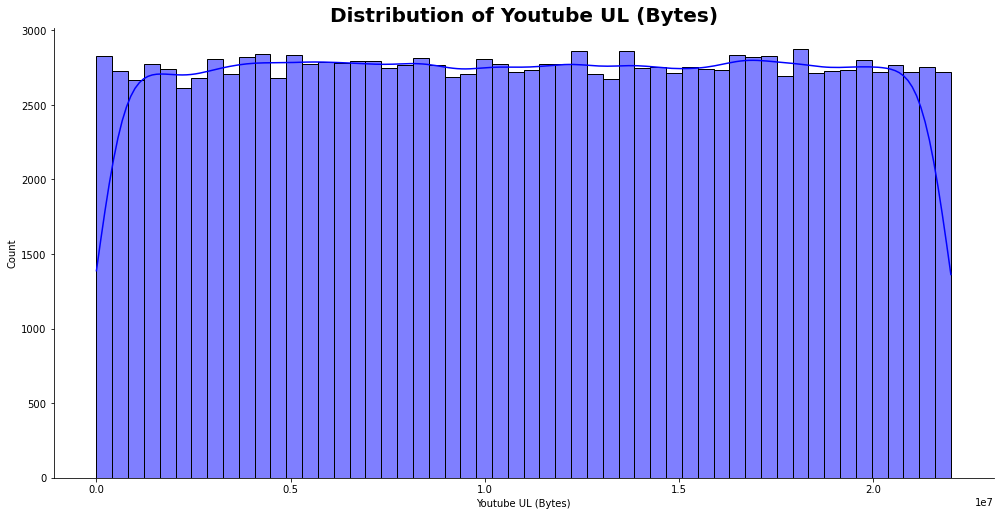

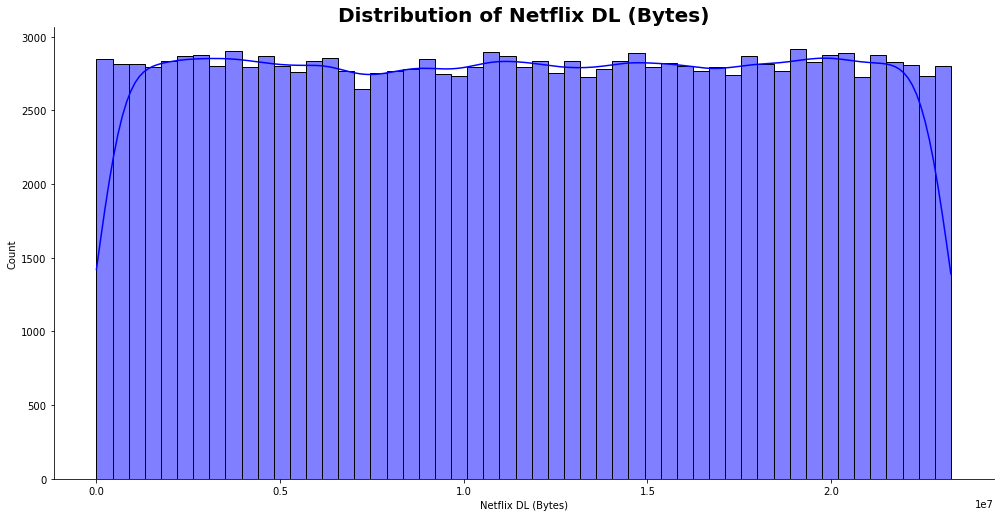

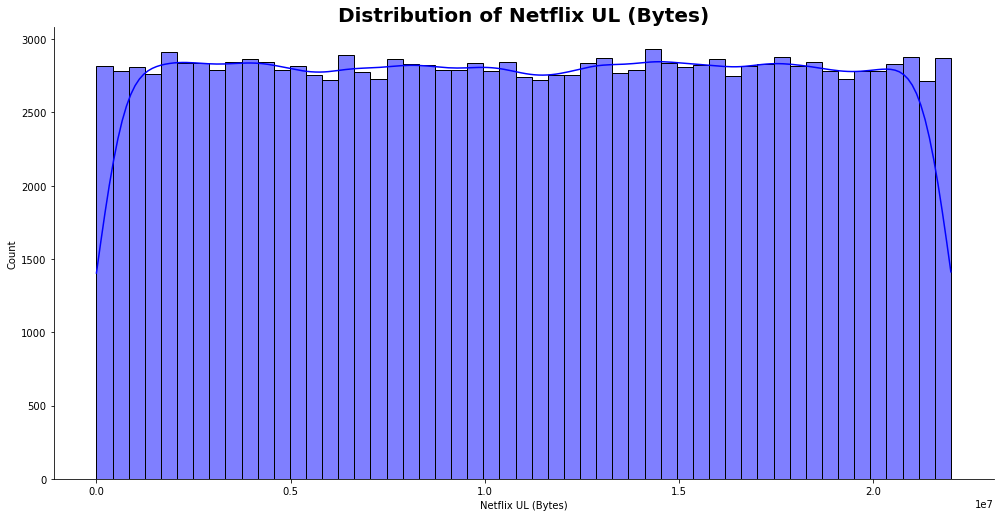

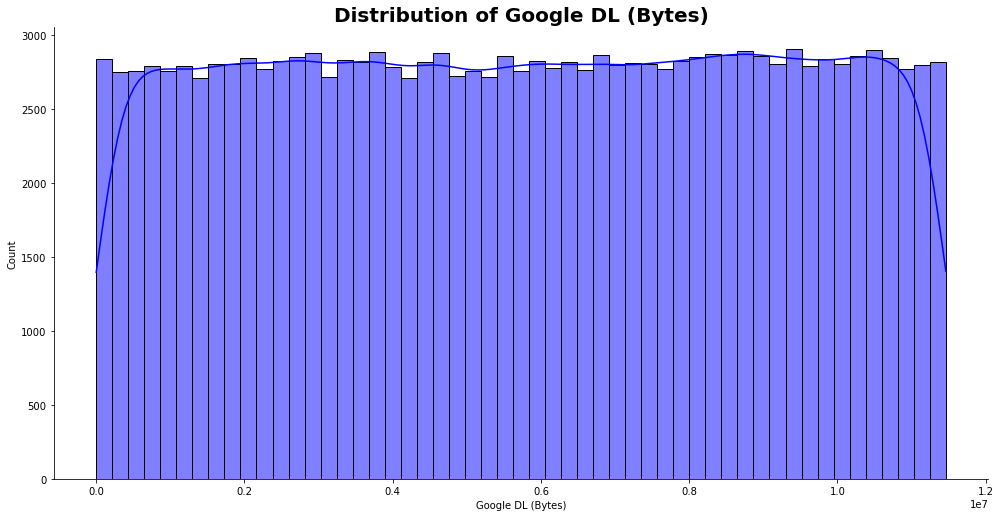

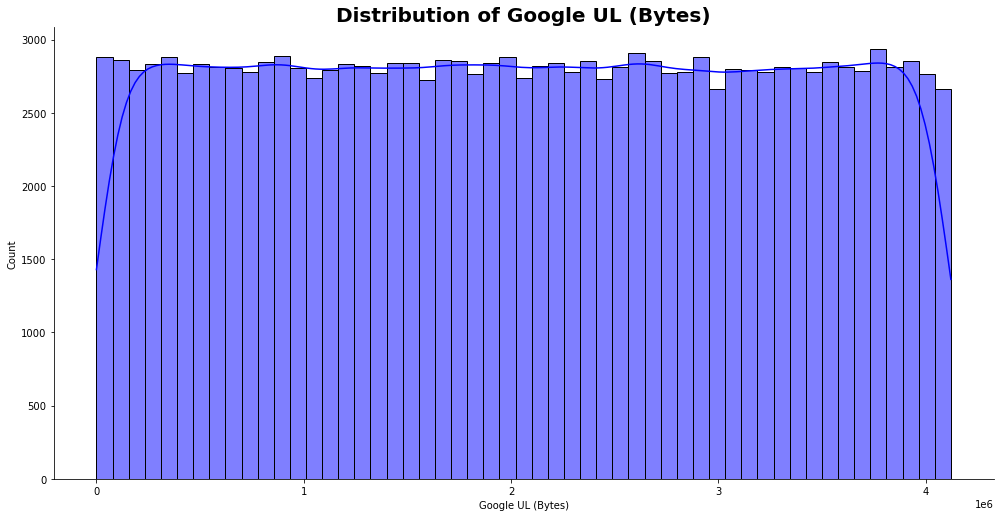

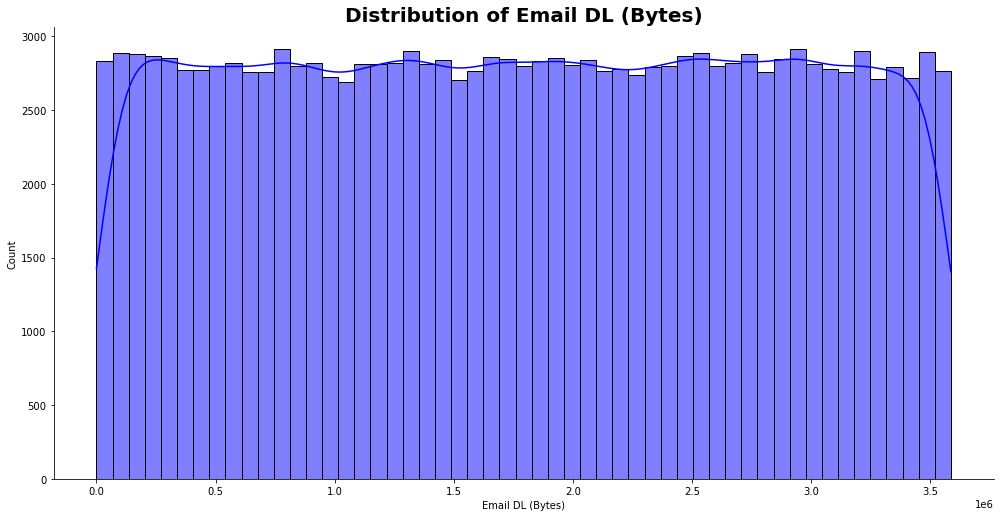

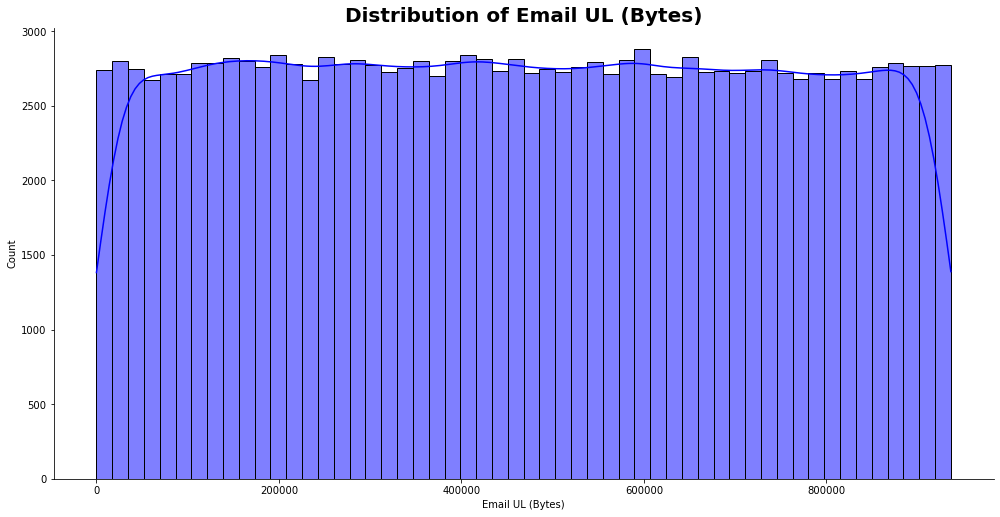

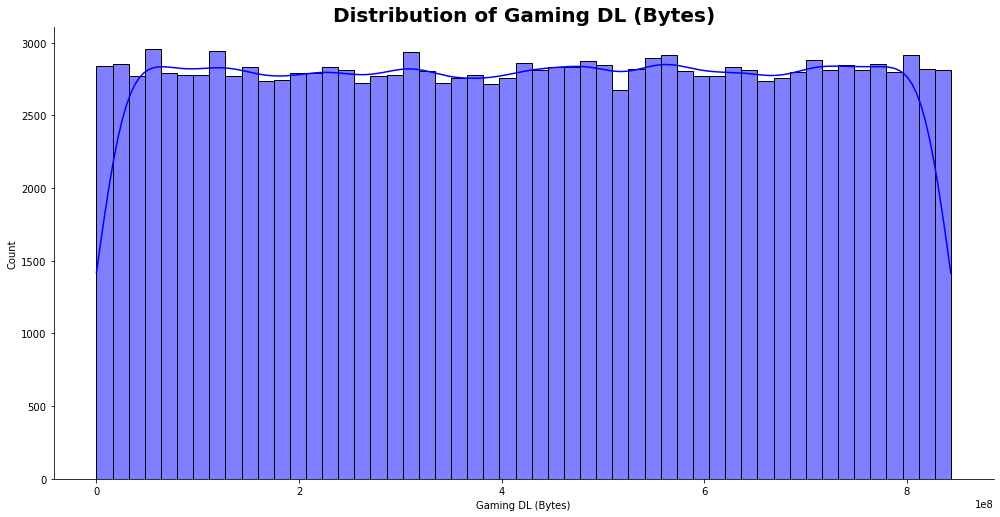

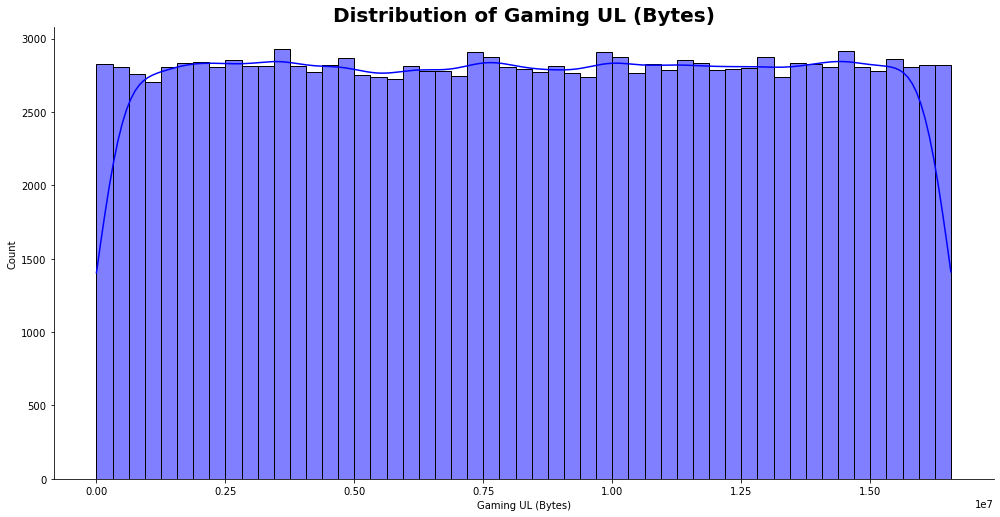

In [150]:
for colum in df_clean.columns.to_list():
    plot_hist(df_clean, colum, "blue")

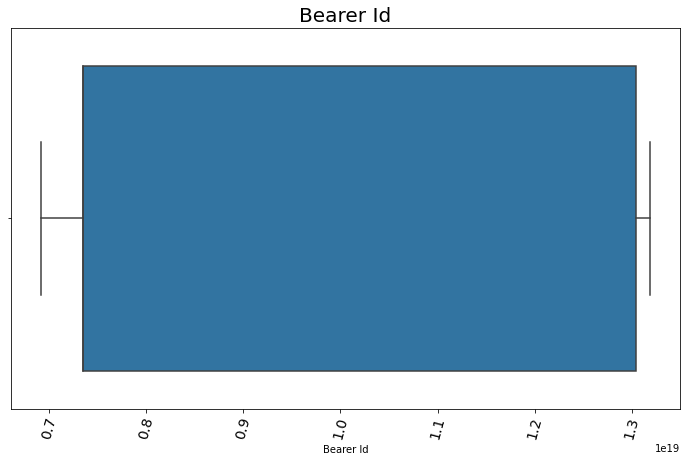

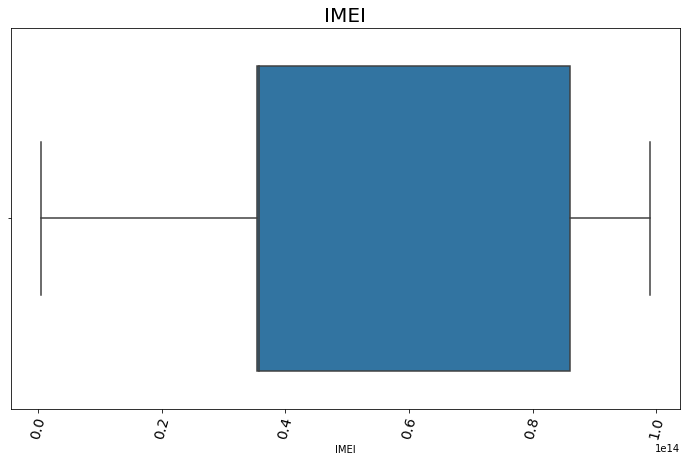

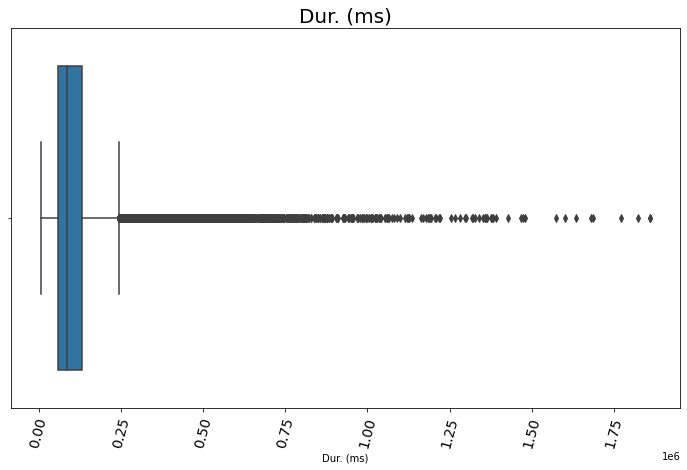

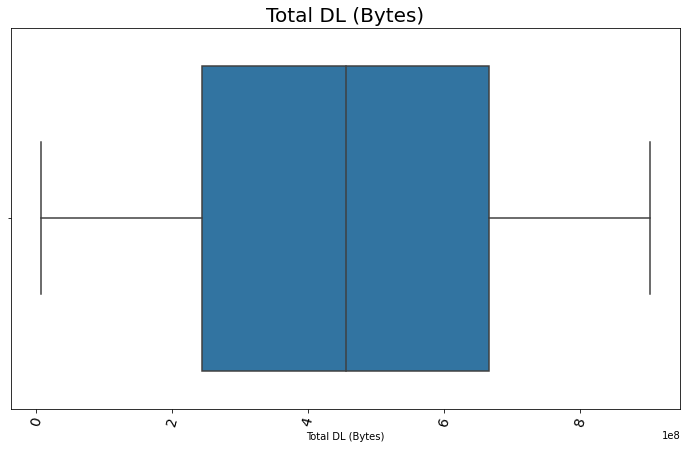

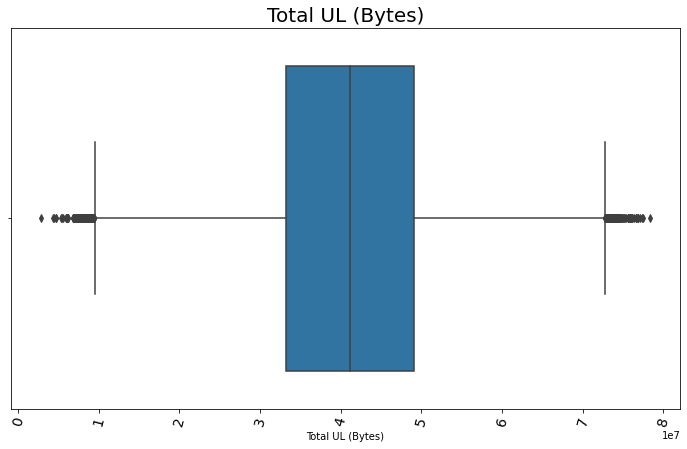

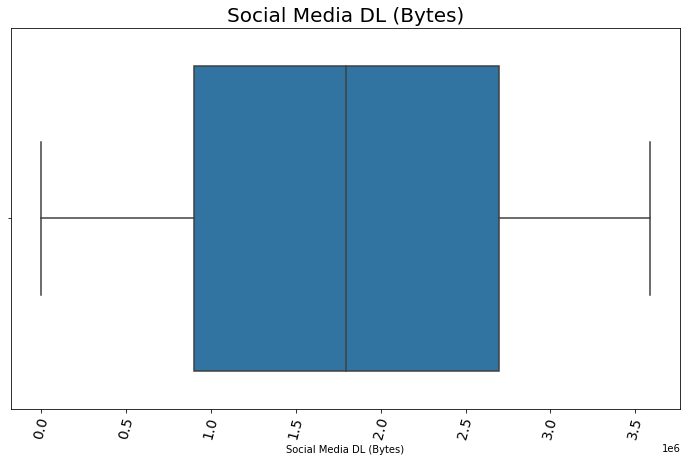

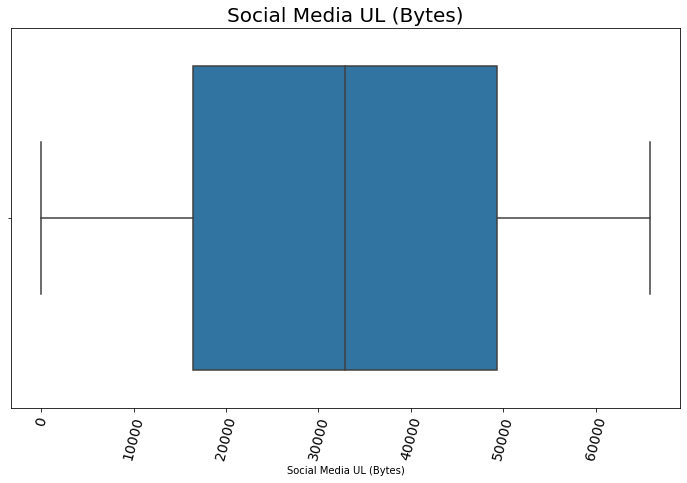

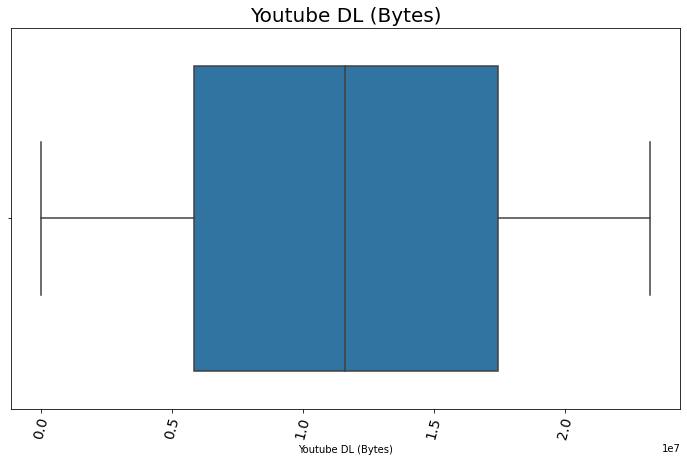

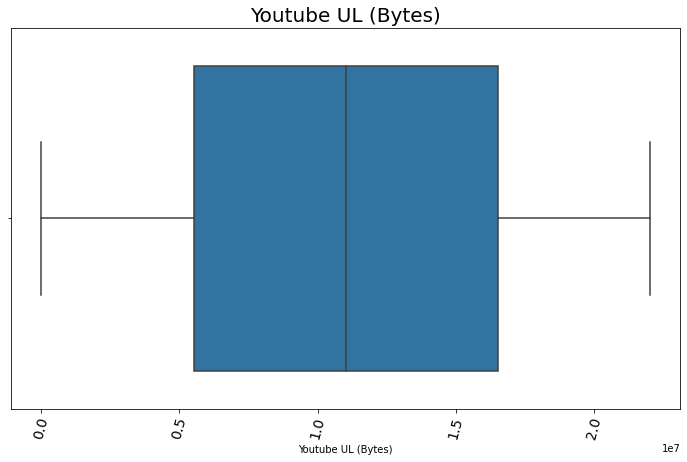

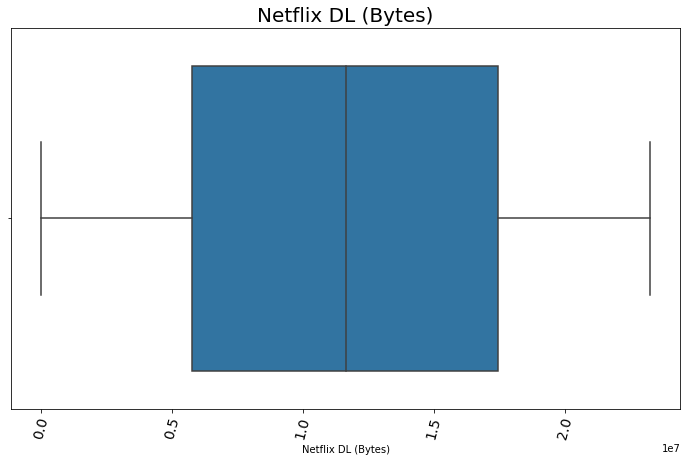

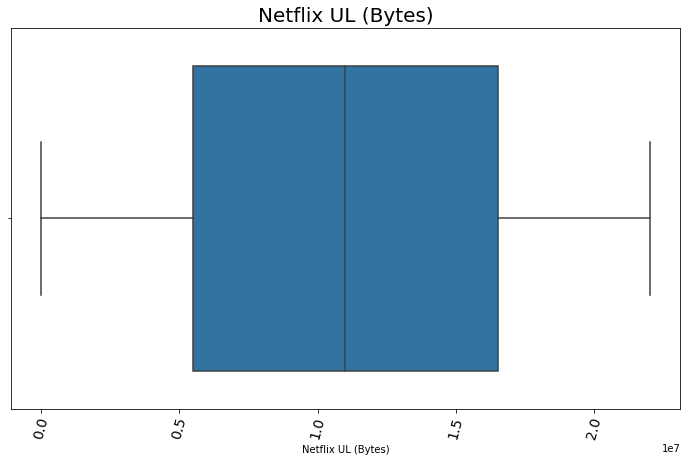

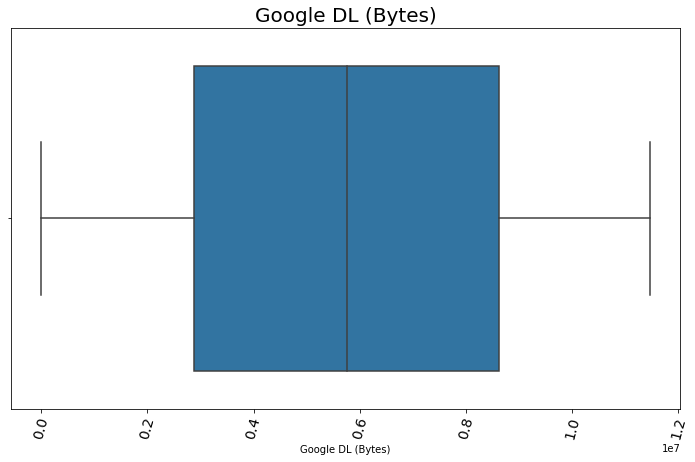

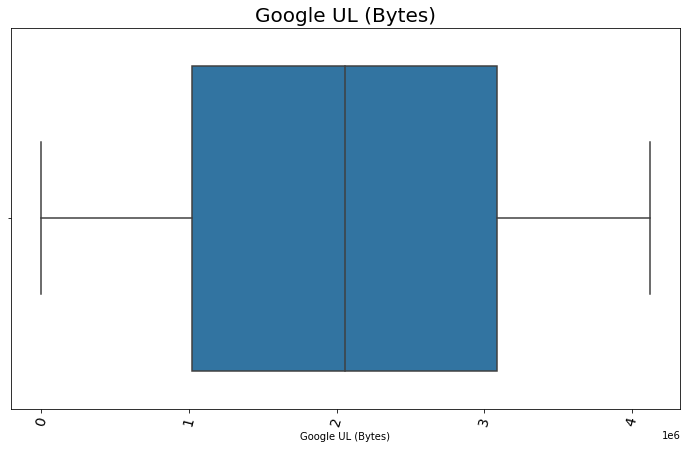

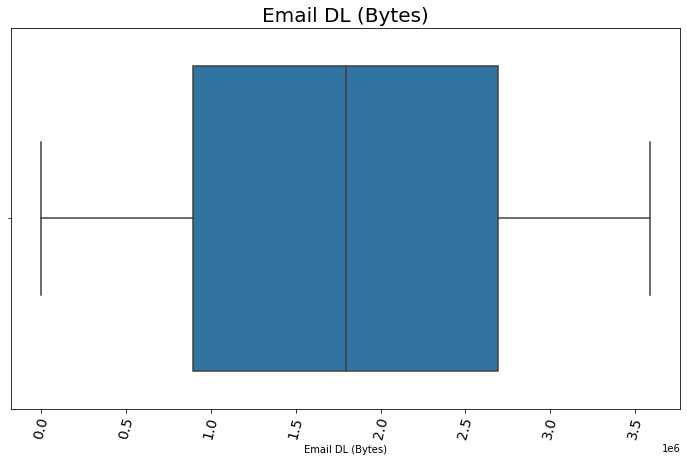

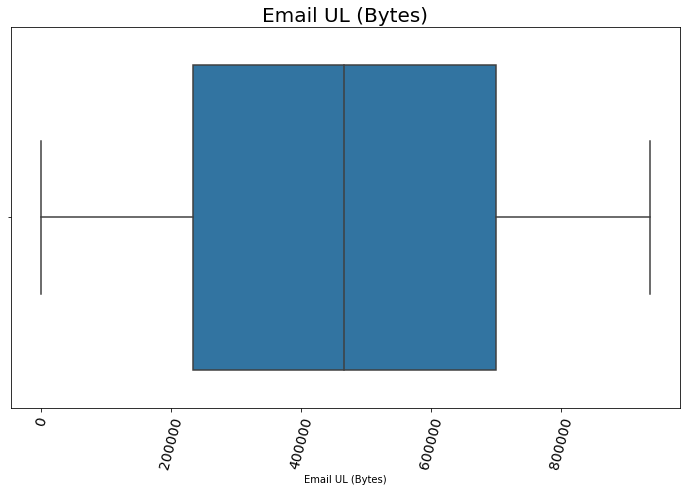

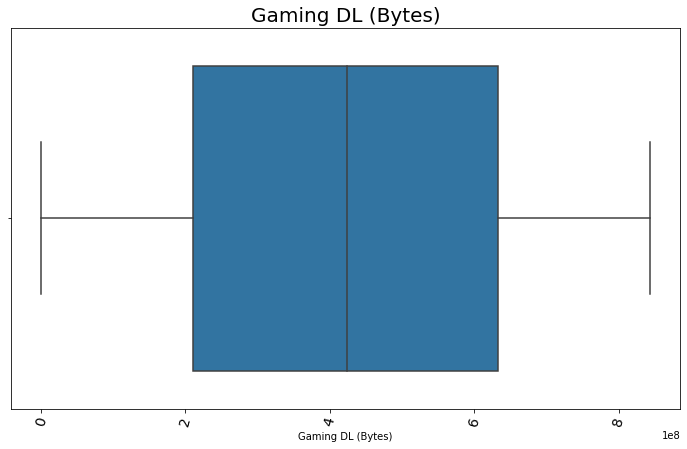

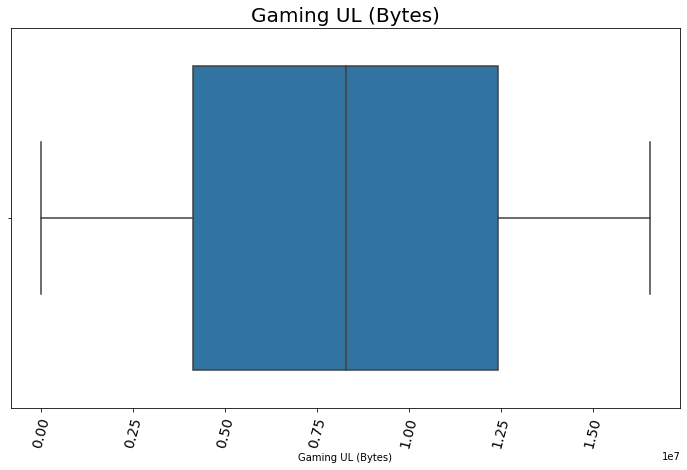

In [152]:
for colum in df_clean.columns.to_list():
    plot_box(df_clean, colum, f"{colum}")

In [155]:
df_clean['Gaming UL (Bytes)']

array([14344150.,  1170709.,   395630., ...,  4735033., 13394316.,
        2529475.])

In [162]:
df_apps_agg

,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
IMEI,,,,,,,,,,
"440,015,202,000.00","2,530,606.00","23,968.00","17,663,991.00","10,703,865.00","9,125,569.00","3,608,143.00","989,198.00","144,441.00","159,786,457.00","1,317,702.00"
"440,213,760,252.00","1,301,037.00","10,391.00","16,138,988.00","5,122,393.00","8,520,422.00","1,514,991.00","2,585,927.00","688,283.00","86,956,751.00","4,188,367.00"
"1,194,900,553,757.00","3,440,702.00","21,582.00","11,564,842.00","12,364,791.00","8,410,141.00","1,073,199.00","1,483,785.00","580,787.00","827,578,143.00","11,383,285.00"
"1,198,200,957,179.00","2,155,310.00","47,026.00","17,902,177.00","19,542,058.00","5,157,701.00","1,790,556.00","1,641,265.00","17,994.00","743,030,255.00","11,575,761.00"
"1,202,600,872,459.00","356,443.00","40,729.00","14,930,167.00","5,631,939.00","5,895,854.00","1,209,943.00","413,901.00","422,686.00","770,457,035.00","3,537,598.00"
...,...,...,...,...,...,...,...,...,...,...
"99,001,201,170,334.00","2,548,908.00","19,423.00","23,028,070.00","3,288,163.00","6,692,349.00","1,614,004.00","3,072,288.00","262,886.00","810,397,893.00","8,034,861.00"
"99,001,201,173,604.00","1,823,780.00","40,173.00","7,657,831.00","16,255,095.00","10,320,330.00","3,955,033.00","855,847.00","407,553.00","253,039,860.00","5,811,282.00"
"99,001,201,174,446.00","1,194,056.00","11,484.00","7,758,118.00","18,200,855.00","8,423,513.00","224,804.00","2,540,187.00","714,363.00","313,938,694.00","14,484,574.00"


In [167]:
df_apps_agg.sort_values(by=['IMEI'] ,ascending=False).head(5)

,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
IMEI,,,,,,,,,,
"99,001,201,327,774.00","3,160,354.00","47,571.00","11,712,040.00","17,491,066.00","2,273,925.00","692,421.00","1,412,808.00","303,858.00","458,369,987.00","8,456,271.00"
"99,001,201,184,888.00","1,523,973.00","36,687.00","21,892,427.00","20,132,095.00","7,989,805.00","3,664,900.00","3,518,168.00","332,090.00","813,588,652.00","15,139,625.00"
"99,001,201,174,446.00","1,194,056.00","11,484.00","7,758,118.00","18,200,855.00","8,423,513.00","224,804.00","2,540,187.00","714,363.00","313,938,694.00","14,484,574.00"
"99,001,201,173,604.00","1,823,780.00","40,173.00","7,657,831.00","16,255,095.00","10,320,330.00","3,955,033.00","855,847.00","407,553.00","253,039,860.00","5,811,282.00"
"99,001,201,170,334.00","2,548,908.00","19,423.00","23,028,070.00","3,288,163.00","6,692,349.00","1,614,004.00","3,072,288.00","262,886.00","810,397,893.00","8,034,861.00"
